# Homework 4
## Kyle Hadley

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
import warnings
warnings.simplefilter('ignore')

## 1. Constraint Reformulations

Given $f(x) = \frac{1}{2}x^TQx + c^Tx$ and minimizing $f(x)$ such that $x \in \mathcal{X}$ where $\mathcal{X}$ is expressed in two forms.

### (a)

Given our optimality conditions $\frac{\partial f}{\partial x} = v^TA$ and $Ax=b$.

To solve for $v^*$ and $x^*$, we first start by multiplying our 1st optimality condition by the value of $AQ^{-1}$ such that

$$AQ^{-1}(Qx + c) = AQ^{-1}(-A^Tv)$$
$$AQ^{-1}Qx + AQ^{-1}c = -AQ^{-1}A^Tv$$
$$Ax + AQ^{-1}c = -AQ^{-1}A^Tv$$

Substituting our second optimality condition $Ax = b$,

$$b + AQ^{-1}c = -AQ^{-1}A^Tv$$
$$v^* = (-AQ^{-1}A^T)^{-1}(b + AQ^{-1}c)$$

To solve for $x^*$ in terms of $b$, we can substitute our relationship for $v^*$ into our first optimality condition such that

$$Qx^* + c = -A^Tv^*$$
$$x^* = -A^T(-AQ^{-1}A^T)^{-1}(b + AQ^{-1}c) - c$$

### (b)

Given our optimality conditions $\begin{bmatrix}\frac{\partial f}{\partial x} & \frac{\partial f}{\partial z} \end{bmatrix} = \tau^T \begin{bmatrix} I & -N \end{bmatrix}$ and $x = Nz + x^0$.

To solve for $x^*$, $z^*$, and $\tau$, we can solve for the partial derivatives to generate two equations as follows

$$\begin{bmatrix}\frac{\partial f}{\partial x} & \frac{\partial f}{\partial z} \end{bmatrix} = \tau^T \begin{bmatrix} I & -N \end{bmatrix}$$
$$\begin{bmatrix}x^TQ + c^T & 0 \end{bmatrix} = \tau^T \begin{bmatrix} I & -N \end{bmatrix}$$

From this, we find two equations
$$x^TQ + c^T= \tau^T$$
$$0 = -\tau^TN$$

We can use the second equation to find our value for $\tau$. With the second equation, we can see that $\tau$ must be orthogonal to the columns of $N$ and we know that $AN = 0$ given that $N$ forms a basis for $\mathcal{A}$. Thus, we determine that $\tau = A^Tv$ for a given $v$.

We can solve for $z^*$ from our first equation and the relationship that $x^T = {x^0}^T + z^TN^T$.

$$x^TQ +c^T= \tau^T$$
$$({x^0}^T + z^TN^T)Q +c^T= \tau^T$$

We can now right-hand multiply both sides of our equation by $N$ such that

$$[({x^0}^T + z^TN^T)Q +c^T]N= \tau^TN$$
$${x^0}^TN + z^TN^TQN +c^TN= \tau^TN$$

We know from our second equation that right-hand side of our equation is equal to zero ($0 = -\tau^TN$), thus we can now simplify the left-hand side and solve for $z^*$.

$${x^0}^TN + z^TN^TQN +c^TN= 0$$
$$z^T = (-{x^0}^TQN - c^TN)(N^TQN)^{-1}$$

We know that $x$ is a function of $z$ given that $x = Nz + x^0$, thus we can see that

$$x = N[(-{x^0}^TQN - c^TN)(N^TQN)^{-1}]^T + x^0$$
$$x = -N(N^TQN)^{-1}(NQx^0 + N^Tc) + x^0$$

### (c)

If we turn our optimization problem into an unconstrained optimization problem using Form 2 of $\mathcal{X}$, we can solve for $z$. We are given that $f(x) = \frac{1}{2}x^TQx + c^Tx$ and $x = Nz+d$, thus we can substitue our relationship for $x$ into our $f(x)$ such that,

$$f(z) = \frac{1}{2}({x^0}^T + z^TN^T)Q(Nz + {x^0}) + c^T(Nz+{x^0})$$
$$f(z) = \frac{1}{2}{x^0}^TQx^0 + {x^0}^TQNz + \frac{1}{2}z^TN^TQNz +c^TNz + c^T{x^0}$$

We can now take the partial derivative of $f(z)$ with respect to $z$ and equate the resulting derivative to zero such that

$$\frac{\partial f}{\partial z} = z^TN^TQN + {x^0}^TQN + c^TN = 0$$

Solving for $z$ given this relationship we find that

$$z^T = (-{x^0}^TQN-c^TN)(N^TQN)^{-1}$$

Note: We can see that this solution for $z$ is equivalent to what we solved for in part (b), thus we can presume that $x$ will also be equivalent to part (b).

### (d)

In order to see that the optimization problems are the same, we need to find a relationship between $A$ and $N$ so that we can transform our form for $x$ from part (b) and (c) into the form as stated in part (a).

We know that $A$ and $N$ are related such that

$$\begin{bmatrix}A^T & N \end{bmatrix}^{-1} = \begin{bmatrix} (AA^T)^{-1}A \\ (N^TN)^{-1}N^{T}\end{bmatrix}$$

$$I = \begin{bmatrix}A^T & N \end{bmatrix}\begin{bmatrix}A^T & N \end{bmatrix}^{-1}$$
$$I = \begin{bmatrix}A^T & N \end{bmatrix}\begin{bmatrix} (AA^T)^{-1}A \\ (N^TN)^{-1}N^{T}\end{bmatrix}$$
$$I = A^T(AA^T)^{-1}A + N(N^TN)^{-1}N^T$$
$$I - N(N^TN)^{-1}N^T= A^T(AA^T)^{-1}A$$

Solving for $N$ we can find a relationship such that we can replace $N$ with $A$ such that we can show that the solution from parts (b) and (c) are equivalent to part (a).

## 2. Inequality Constraint Reformulations

Given $Ax = b$ and $Cx \geq d$ where $A = \begin{bmatrix} 1 & 1 & 0 \end{bmatrix}$, $b=1$, $C = \begin{bmatrix} -1 & 0 & 0\\ 1 & 0 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & -1 \end{bmatrix}$, and $d = \begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix}$.

### (a)

Plotting the set of $x's$ that satisfy the equations as defined above.

Two plots are given due to constraints of plotting multiple surfaces on a single plot. The first plot represents $Ax=b$; the second plot includes $Cx \geq d$ and the resulting space with combining both equations.

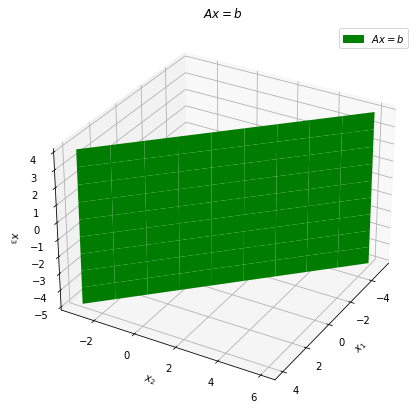

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# Make data and plot Ax = b
x_1 = np.arange(-5, 5, 1)
x_3 = np.arange(-5, 5, 1)
x_1, x_3 = np.meshgrid(x_1, x_3)
x_2 = 1 - x_1
col1_patch = mpatches.Patch(color='green', label='$Ax=b$') # Info for legend

ax.plot_surface(x_1, x_2, x_3, color='green')

# Plot details
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend(handles=[col1_patch])
ax.set_title('$Ax=b$')
ax.view_init(30, 30)
fig.show()

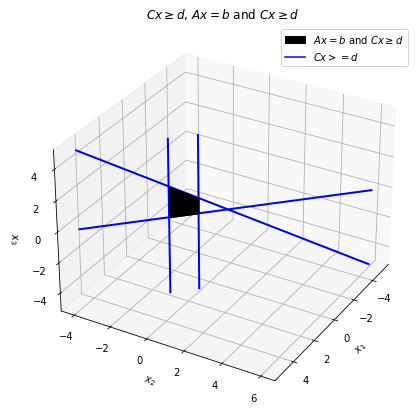

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# Make data and plot Cx >= d
blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='$Cx>=d$') # Info for legend

ax.plot(xs=[2, 2], ys=[-1, -1], zs=[-5, 5], color='blue', linewidth='2')

ax.plot(xs=[1, 1], ys=[0, 0], zs=[-5, 5], color='blue', linewidth='2')

ax.plot(xs=[5, -5], ys=[-4, 6], zs=[0, 0], color='blue', linewidth='2')

ax.plot(xs=[5, -5], ys=[-4, 6], zs=[5, -5], color='blue', linewidth='2')

# Plot combination of Ax=b and Cx >= d
x_1 = [1, 1, 2, 2]
x_2 = [0, 0, -1, -1]
x_3 = [0, 1, 2, 0]
verts = [list(zip(x_1,x_2,x_3))]

col1_patch = mpatches.Patch(color='black', label='$Ax=b$ and $Cx \geq d$') # Info for legend

ax.add_collection3d(Poly3DCollection(verts, edgecolor='black', facecolor='black'))

# Plot details
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend(handles=[col1_patch, blue_line])
ax.set_title('$Cx \geq d$, $Ax=b$ and $Cx \geq d$')
ax.view_init(30, 30)
fig.show()

### (b)

Given $A$ and $b$, we can represent this set in the form $x = Nz + x^0$ such that the columns of $N$ form a basis for the nullspace of $A$.

We can define an $N$ such that it spans the nullspace of $A$ as

$$N = \begin{bmatrix}-1 & 0 \\ 1 & 0 \\ 0 & 1\end{bmatrix}$$

We can solve for $x^0$ by substituing $x = Nz + x^0$ into $Ax=b$ such that

$$A(Nz + x^0) = b$$

We know that the first term ($ANz$) is equal to zero, thus the equation is $Ax^0 = b$.

$$\begin{bmatrix}1 & 1 & 0\end{bmatrix}x^0 = 1$$
$$x^0_1 + x^0_2 = 1$$

We select $x^0_3 = 0$ and $x^0_2 = 2$; thus we can solve for $x^0_1 = -1$.

Thus, we find an $N = \begin{bmatrix}-1 & 0 \\ 1 & 0 \\ 0 & 1\end{bmatrix}$ and $x^0=\begin{bmatrix}-1 \\ 2 \\ 0\end{bmatrix}$ for our given $A$ and $b$.

Given this $N$ and $x^0$, we can find our inequality constraints on $z$ by substituing $x = Nz + x^0$ into $Cx \geq d$ such that

$$C(Nz + x^0) \geq d$$
$$CNz + Cx^0 \geq d$$

Solving this equation such that it relates to $Ez \geq h$ we find that

$$CNz \geq d - Cx^0$$

which implies that $E = CN$ and $d - Cx^0 = h$. Thus, we find that $E$ is equal to

$$E = CN = \begin{bmatrix} -1 & 0 & 0\\ 1 & 0 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & -1 \end{bmatrix}\begin{bmatrix}-1 & 0 \\ 1 & 0 \\ 0 & 1\end{bmatrix}$$
$$E = \begin{bmatrix} 1 & 0 \\ -1 & 0 \\ 0 & 1 \\ -1 & -1\end{bmatrix}$$

And solving for $h$

$$h = d -Cx^0 = \begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix} - \begin{bmatrix} -1 & 0 & 0\\ 1 & 0 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & -1 \end{bmatrix}\begin{bmatrix}-1 \\ 2 \\ 0\end{bmatrix}$$
$$h = \begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix} - \begin{bmatrix} 1 \\ -1 \\ 0 \\ -1\end{bmatrix}$$
$$h = \begin{bmatrix} -3 \\ 2 \\ 0 \\ 1 \end{bmatrix}$$

If we chose a different $N$ or $x^0$, $E$ and $h$ would be equivalent (or at least scaled factors of the same values we derived above).

### (c)

Given $E = \begin{bmatrix} 1 & 0 \\ -1 & 0 \\ 0 & 1 \\ -1 & -1\end{bmatrix}$ and $h = \begin{bmatrix} -3 \\ 2 \\ 0 \\ 1 \end{bmatrix}$ as calculated in part (b), we can plot $z \in \mathbb{R}^2$ such that $Ez \geq h$.

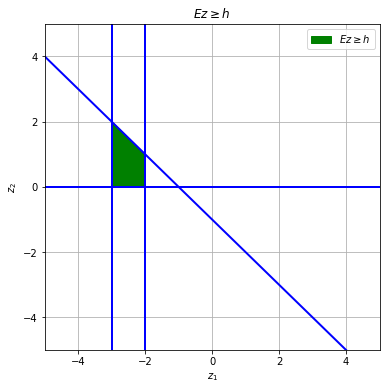

In [5]:
# Plot the various constraints of Ez >= h
fig, ax = plt.subplots(figsize=(6, 6))

x = np.linspace(-5, 5, num=100)

# 1st row
ax.axvline(-3, linewidth=2, color='blue')

# 2nd row
ax.axvline(-2, linewidth=2, color='blue')

# 3rd row
y = 0 * x
ax.plot(x, y, linewidth=2, color='blue')

# 4th row
y = -1 - x
ax.plot(x, y, linewidth=2, color='blue')

# Plot the inequality as a patch
xy = [[-2, 0], [-3, 0], [-3, 2], [-2, 1]]
ax.add_patch(mpatches.Polygon(xy, color='green', label='$Ez \geq h$'))

ax.legend()

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_title('$Ez \geq h$')
ax.legend()
ax.grid()
fig.show()

## 3. Inequality Constraints and Positive Matrices \[Ex. Credit]



## 4. Complementary Slackness

### (a)

Given $x \in \mathbb{R}^n$ and $\mu \in \mathbb{R}^n$, we can demonstrate the implicit relationship through the following statements.

If $x_i = 0$, then the relationship $\mu_i x_i = 0$ holds true so $\mu_i > 0$.

If $x_i > 0$, then in order for the relationship $\mu_i x_i = 0$ to hold true $\mu_i$ must equal $0$.

Therefore, we can see that $\mu_i x_i = 0$, $x_i \geq 0$, and $\mu_i \geq 0$ implies that either $x_i=0$ or $\mu_i=0$.

### (b)

Given $x \in \mathbb{R}^n$ and $\mu \in \mathbb{R}^n$, $x_i \geq 0$ and $\mu_i \geq 0$, we can show the implicit relationship through the following statements.

If $\mu_i x_i = 0$ holds true for all values of $i$, then we know that either $x_i = 0$ or $\mu_i =0$ for any $i$ as proven in part (a).

We know that $\mu^Ts = \Sigma \mu_i x_i$, and given that we know that either $x_i = 0$ or $\mu_i=0$ for any given $i$, we can see that $\Sigma \mu_i x_i = 0 = \mu^Ts$.

Thus, we can see that $\mu_i x_i = 0$, $x_i \geq 0$, and $\mu_i \geq 0$ for all $i$ implies $\mu^Ts =0$.

## 5. Lagrangians

### (a)

Given $f(x) = \frac{1}{2}x^Tx$ and $Ax = b$, we can write the Lagrangian for the optimization problem with a dual variable $v$ as given below,

$$\mathcal{L}(x, v) = f(x) + v^Tg(x)$$

We are given $f(x)$ and know that $g(x)$ can be derived from our $Ax=b$ relationship such that $g(x) = Ax - b = 0$. From this, we can now write our Lagrangian as

$$\mathcal{L}(x, v) = \frac{1}{2}x^Tx + v^T(Ax - b)$$

### (b)

Given $A = \begin{bmatrix} - & \bar{A}_1^T & - \\ - & \bar{A}_2^T & -\end{bmatrix} = \begin{bmatrix}0.9 & 0.1 \\ 0.1 & 0.9 \end{bmatrix}$ and $b = \begin{bmatrix} 0.9 \\ 0.9 \end{bmatrix}$, we can generate a plot for the following $h(x)$ in the $\begin{bmatrix}x_1 & x_2 & h(x)\end{bmatrix}^T$ space.

$$h_1(x) = f(x)$$
$$h_2(x) = v_1(\bar{A}_1^Tx - b_1)$$
$$h_3(x) = v_2(\bar{A}_2^Tx - b_2)$$
$$h_4(x) = \mathcal{L}(x, v)$$

Note: By inspection, we can see that $h_4(x) = h_1(x) + h_2(x) + h_3(x)$.

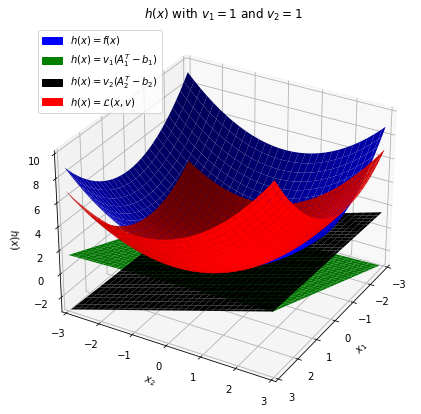

In [6]:
fig = plt.figure(figsize=(7, 7))

#3D
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Plot h_1(x)
x_1 = np.arange(-3, 3, 0.1)
x_2 = np.arange(-3, 3, 0.1)
x_1, x_2 = np.meshgrid(x_1, x_2)
h_1 = 1/2 * (x_1**2 + x_2**2)

ax.plot_surface(x_1, x_2, h_1, color='blue')
h1_label = mpatches.Patch(color='blue', label='$h(x) = f(x)$') # Info for legend

# Plot h_2(x)
v_1 = 1 # Assume a fixed v_1 for now
h_2 = v_1 * (0.9*x_1 + 0.1*x_2 - 0.9)

ax.plot_surface(x_1, x_2, h_2, color='green')
h2_label = mpatches.Patch(color='green', label='$h(x) = v_1(A_1^T-b_1)$') # Info for legend

# Plot h_3(x)
v_2 = 1 # Assume a fixed v_2 for now
h_3 = v_2 * (0.1*x_1 + 0.9*x_2 - 0.9)

ax.plot_surface(x_1, x_2, h_3, color='black')
h3_label = mpatches.Patch(color='black', label='$h(x) = v_2(A_2^T-b_2)$') # Info for legend

# Plot h_4(x)
h_4 = h_1 + h_2 + h_3

ax.plot_surface(x_1, x_2, h_4, color='red')
h4_label = mpatches.Patch(color='red', label='$h(x) = \mathcal{L}(x,v)$') # Info for legend

ax.set_xlim3d([-3, 3])
ax.set_ylim3d([-3, 3])
ax.set_zlim3d([-3, 10])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$h(x)$')
ax.set_title('$h(x)$ with $v_1 = 1$ and $v_2 = 1$')
ax.legend(handles=[h1_label, h2_label, h3_label, h4_label], loc='upper left')
ax.view_init(30, 30)
#ax.view_init(0, 90) # view of h(x), x_1 (x_2 into page) --> good for varying v_1
#ax.view_init(0, 0) # view of h(x), x_2 (x_1 into page) --> good for varying v_2
fig.show()

# Save figure (if desired)
#plt.savefig('v1_neg2.png')

We can see the effect of varying $v_1$ and $v_2$ in the plots as shown below. When we oscillate $v_1$ between $[-2, 2]$ causes "see-sawing" about the $x_2$ axis (as shown by the 1st and 2nd image in which we see the rotation of the green plane about the $x_2$ axis). When we oscillate $v_2$ between $[-2, 2]$ causes "see-sawing" about the $x_1$ axis (as shown by the 3rd and 4th image in which we see the rotation of the black plane about the $x_1$ axis).

![Test](v1_neg2.png)

![Test](v1_pos2.png)

![Test](v2_neg2.png)

![Test](v2_pos2.png)

### (c)

When we replace $Ax = b$ with $Ax \geq b$, the Lagrangian does change to the function below,

$$\mathcal{L}(x,v) = f(x) - v^Tg(x)$$
$$\mathcal{L}(x, v) = \frac{1}{2}x^Tx - v^T(Ax - b)$$

With the new form of Lagrangian, we also must impose the the following constraints on $v_1$ and $v_2$: $v_1 \geq 0$ and $v_2 \geq 0$.

By flipping the sign of the of the second term of the Lagrangian, this doesn't impact the first and second surface discussed. The third surface however (the Lagrangian itself) will interact in the opposite manner as discussed in part(b).